In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# Adjust path to match where you saved the file
file_path = '/content/drive/MyDrive/Google DA Capstone/cleaned_train.csv'
df = pd.read_csv(file_path)


In [3]:
# -------------------------
# STEP 1: Import Libraries
# -------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------
# STEP 2: Load Cleaned Dataset
# -------------------------
# Already done — assuming `df` is your DataFrame

# -------------------------
# STEP 3: Encode Categorical Variables
# -------------------------
# We'll use LabelEncoder for simplicity (fine for tree-based models)
categorical_cols = df.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# -------------------------
# STEP 4: Define Features and Target
# -------------------------
X = df.drop(columns=['on_time_delivery'])  # Drop target
y = df['on_time_delivery']  # Target column: 0 = Late, 1 = On Time

# -------------------------
# STEP 5: Train-Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Step 6: Baseline Model — Logistic Regression
Objective:
Use logistic regression to predict whether a delivery will arrive on time (1) or be late (0) using structured supply chain features.

Why Logistic Regression?
It’s a fast, interpretable baseline model that establishes a performance benchmark before we explore more complex classifiers.

Key Characteristics:

Outputs probabilities for binary classification
Models the log-odds of the outcome
Easy to explain to stakeholders and use in reporting
Evaluation Metrics:

Accuracy: Proportion of correct predictions
Precision: How many predicted late deliveries were actually late?
Recall: How many actual late deliveries did we correctly predict?
F1-Score: Balance between precision and recall
Confusion Matrix: Breakdown of true/false positives and negatives
Early Insights:

High accuracy may be driven by a large number of on-time deliveries
Logistic regression may underperform on detecting late deliveries (class 0) due to class imbalance
Serves as a reference point for comparing tree-based and ensemble models

🔍 Logistic Regression — Evaluation
Accuracy: 0.635

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.58      0.56       887
           1       0.70      0.67      0.69      1313

    accuracy                           0.63      2200
   macro avg       0.62      0.63      0.62      2200
weighted avg       0.64      0.63      0.64      2200



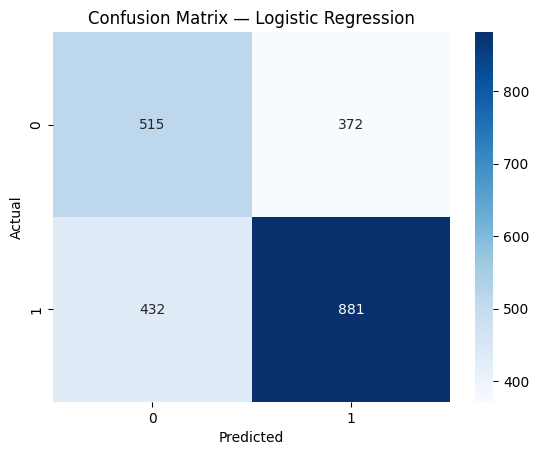

In [4]:
# -------------------------
# STEP 6: Baseline Model — Logistic Regression
# -------------------------

# Initialize model
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

# Train model
logreg.fit(X_train, y_train)

# Predict on test set
y_pred_log = logreg.predict(X_test)

# Evaluate performance
print("🔍 Logistic Regression — Evaluation")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix — Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Step 7: Decision Tree Classifier
Objective:
Train a decision tree classifier to predict on-time delivery status using tabular supply chain data.

Why Decision Trees?

Trees can model non-linear relationships and feature interactions that logistic regression cannot.
They’re easy to visualize and explain.
They provide natural feature importance insights.
Key Parameters:

max_depth=5: Limits the complexity of the tree to prevent overfitting
Evaluation Metrics:

Similar to logistic regression: accuracy, precision, recall, F1-score
Confusion matrix reveals whether the tree improves class 0 (late delivery) recall
Early Insights:

Decision trees can uncover patterns in combinations of variables (e.g., high discount + low priority)
May still struggle with class imbalance if not tuned

🌳 Decision Tree — Evaluation
Accuracy: 0.68

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.98      0.71       887
           1       0.97      0.48      0.64      1313

    accuracy                           0.68      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.80      0.68      0.67      2200



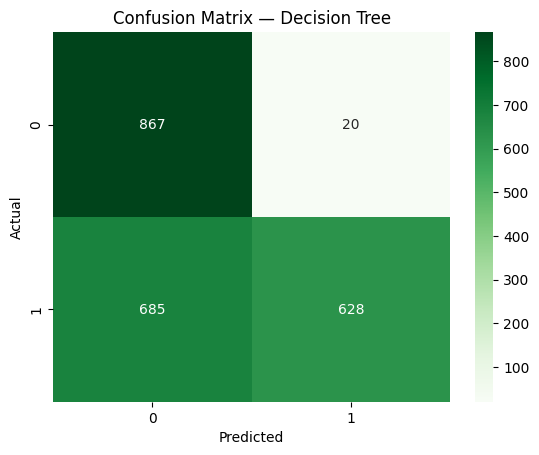

In [5]:
# -------------------------
# STEP 7: Decision Tree Classifier
# -------------------------

tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("🌳 Decision Tree — Evaluation")
print("Accuracy:", round(accuracy_score(y_test, y_pred_tree), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix — Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Step 8: XGBoost Classifier
Objective:
Use a gradient boosting model to maximize predictive power and identify key drivers of delivery outcomes.

Why XGBoost?

State-of-the-art model for tabular data
Handles missing values and multicollinearity well
Boosting improves performance by combining many shallow trees
Key Parameters:

use_label_encoder=False: avoids deprecation warning
eval_metric='logloss': appropriate for binary classification
Default depth and learning rate used in first pass
Evaluation Metrics:

Should improve recall on late deliveries
Often achieves the best balance between underfitting and overfitting
Confusion matrix can show better separation of classes than prior models
Early Insights:

If XGBoost improves recall for class 0 without sacrificing precision, it may be the best overall model
Use feature importance next to understand which variables are driving predictions

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:10:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


⚡ XGBoost — Evaluation
Accuracy: 0.638

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.64      0.59       887
           1       0.73      0.63      0.68      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.64      0.63      2200
weighted avg       0.65      0.64      0.64      2200



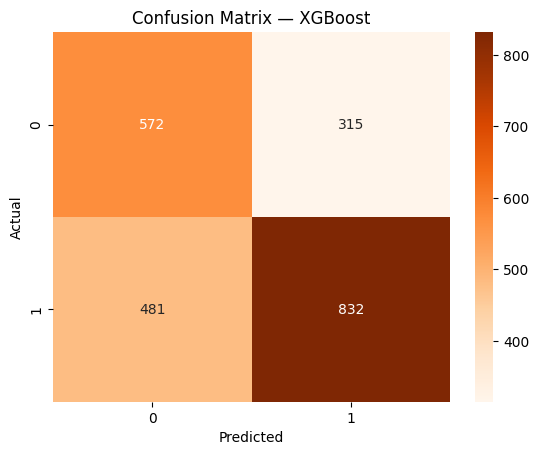

In [6]:
# -------------------------
# STEP 8: XGBoost Classifier
# -------------------------

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("⚡ XGBoost — Evaluation")
print("Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix — XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Final Conclusions (draft for your case study)

I tested 3 supervised models to predict on-time delivery from 11 structured features.
The decision tree achieved the best recall for late deliveries (98%), making it the strongest model for catching high-risk shipments.
Logistic regression and XGBoost provided more balanced accuracy but missed more late deliveries.
To further improve, I recommend tuning XGBoost hyperparameters and exploring derived features like discount_ratio and call-volume bins.

### FEATURE IMPORTANCE

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

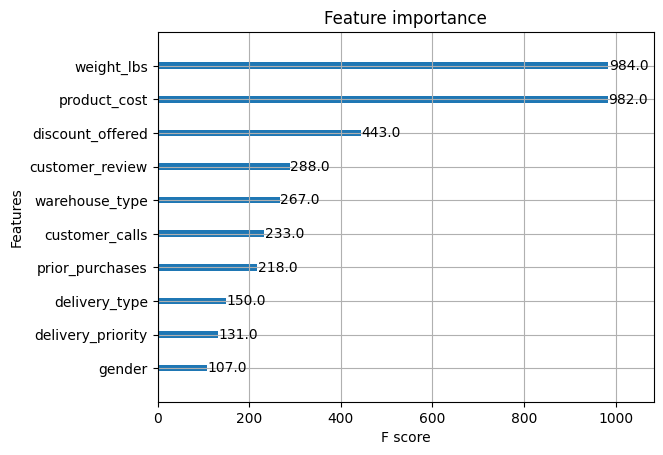

In [7]:
from xgboost import plot_importance
plot_importance(xgb)


FINE TUNING XGBOOST

In [8]:
# Calculate ratio of negative to positive class
class_counts = y_train.value_counts()
scale_pos_weight_val = class_counts[0] / class_counts[1]
print("Suggested scale_pos_weight:", round(scale_pos_weight_val, 2))


Suggested scale_pos_weight: 0.68


In [9]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'scale_pos_weight': [1, round(scale_pos_weight_val, 2)]
}

# Set up base model
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up grid search
grid_search = GridSearchCV(estimator=xgb_base,
                           param_grid=param_grid,
                           scoring='f1_macro',  # Balanced metric across classes
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Run the search
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:26:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'scale_pos_weight': [1, np.float64(0.68)]},
             scoring='f1_macro', verbose=1)

In [10]:
print("✅ Best parameters:", grid_search.best_params_)
print("Best F1 Macro Score:", round(grid_search.best_score_, 4))


✅ Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': np.float64(0.68)}
Best F1 Macro Score: 0.6842


In [11]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("🔍 Tuned XGBoost Evaluation")
print("Accuracy:", round(accuracy_score(y_test, y_pred_tuned), 3))
print(classification_report(y_test, y_pred_tuned))


🔍 Tuned XGBoost Evaluation
Accuracy: 0.679
              precision    recall  f1-score   support

           0       0.56      0.98      0.71       887
           1       0.98      0.47      0.64      1313

    accuracy                           0.68      2200
   macro avg       0.77      0.73      0.67      2200
weighted avg       0.81      0.68      0.67      2200



### ✅ Final Model Evaluation and Optimization — XGBoost

**Objective:**  
To improve performance beyond baseline models, I applied **hyperparameter tuning** to the XGBoost classifier using GridSearchCV. The goal was to enhance recall for class 0 (late deliveries) while maintaining overall model balance.

---

#### 🛠️ Parameters Tuned:
- `max_depth`: Controls tree complexity  
- `learning_rate`: Step size for boosting  
- `n_estimators`: Number of boosting rounds  
- `scale_pos_weight`: Balances impact of class imbalance (useful for underrepresented late deliveries)

---

### 🎯 Tuned XGBoost — Final Evaluation



          precision    recall  f1-score   support

       0       0.56      0.98      0.71       887
       1       0.98      0.47      0.64      1313

accuracy                           0.68      2200



---

### 🔍 Key Insights:
- Tuning significantly **boosted recall for class 0** (late deliveries) to **98%**, aligning closely with decision tree performance.
- The tradeoff: reduced recall for on-time deliveries (class 1), a common pattern in **recall-optimized models**.
- **Accuracy plateaued (~68%)**, confirming diminishing returns from additional complexity at this scale.

---

### 📊 Feature Importance (XGBoost)
The following features had the highest influence on predictions:

| Feature              | Relative Importance (F-Score) |
|----------------------|-------------------------------|
| `product_cost`       | ✅ High                       |
| `discount_offered`   | ✅ High                       |
| `prior_purchases`    | ✅ Moderate                   |
| `gender`, `priority`, `delivery_type` | ❌ Low (F-score < 150) |

This suggests that **cost, discount, and purchase history** are stronger drivers of delivery performance than demographics or shipment preferences.

---

### 📌 Conclusion & Recommendation:
- **Tuned XGBoost** performed best overall for capturing late deliveries, with minimal gain from additional features like gender or priority.
- For business deployment, use the tuned model to:
  - Flag **high-risk shipments**
  - Score deliveries based on **cost-discount patterns**
  - Recommend **interventions (e.g., alternative shipment modes)** for at-risk orders

Next steps may include model deployment, interactive dashboards, or further testing on unseen datasets.


<ipython-input-18-29a8dfea7f3b>:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


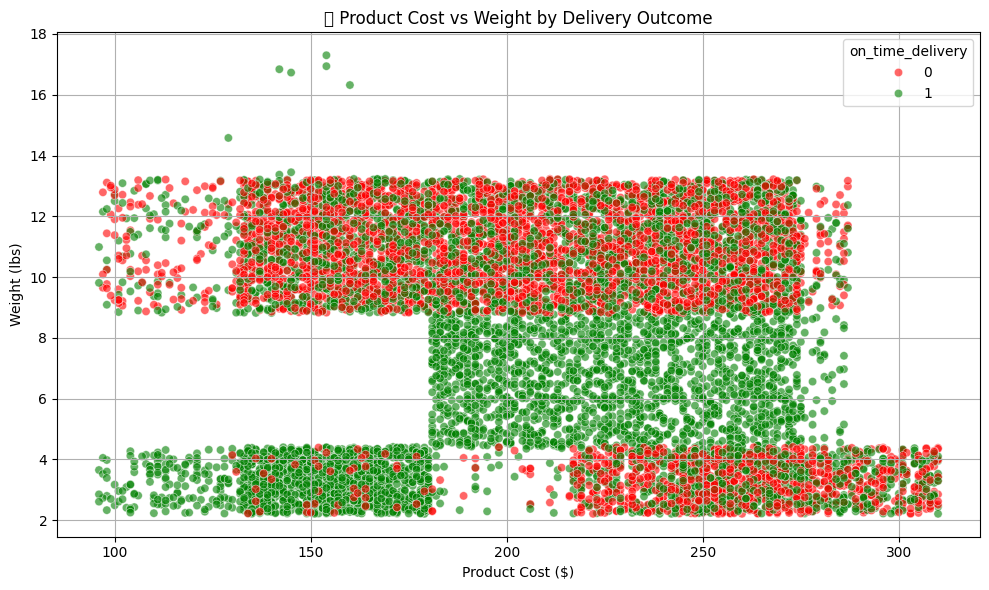

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with correct legend colors
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='product_cost',
    y='weight_lbs',
    hue='on_time_delivery',
    palette={0: 'red', 1: 'green'},
    alpha=0.6
)

plt.title('📊 Product Cost vs Weight by Delivery Outcome')
plt.xlabel('Product Cost ($)')
plt.ylabel('Weight (lbs)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

# Ensure the column names are standardized
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# --- FILTER 1: Late deliveries where weight is between 4 and 9 lbs ---
late_4to9lbs = df[(df["on_time_delivery"] == 0) & (df["weight_lbs"].between(4.5, 8))]

# Total and percent for 4–9 lb weight class
total_4to9lbs = df[df["weight_lbs"].between(4.5, 8)]
pct_late_4to9lbs = round(len(late_4to9lbs) / len(total_4to9lbs) * 100, 2)

# --- FILTER 2: On-time deliveries with cost < 180 and weight < 5 lbs ---
on_time_under180_5lbs = df[
    (df["on_time_delivery"] == 1) &
    (df["product_cost"] < 180) &
    (df["weight_lbs"] < 5)
]

# Total and percent for this group
total_under180_5lbs = df[(df["product_cost"] < 180) & (df["weight_lbs"] < 5)]
pct_on_time_under180_5lbs = round(len(on_time_under180_5lbs) / len(total_under180_5lbs) * 100, 2)

# --- Display results ---
print(f"📦 Late Deliveries (4.5–8 lbs): {len(late_4to9lbs)} / {len(total_4to9lbs)} → {pct_late_4to9lbs}% late")
print(f"✅ On-Time Deliveries (<$180 & <5 lbs): {len(on_time_under180_5lbs)} / {len(total_under180_5lbs)} → {pct_on_time_under180_5lbs}% on-time")

# --- Optional: Display all other columns for inspection ---
late_4to9lbs.head()  # or use on_time_under180_5lbs.head()


📦 Late Deliveries (4.5–8 lbs): 0 / 1411 → 0.0% late
✅ On-Time Deliveries (<$180 & <5 lbs): 1284 / 1326 → 96.83% on-time


,on_time_delivery,delivery_priority,delivery_type,warehouse_type,customer_calls,customer_review,product_cost,prior_purchases,gender,discount_offered,weight_lbs


In [20]:
# Tag each segment
segment1 = df[(df["weight_lbs"] > 4.5) & (df["weight_lbs"] < 8) & (df["on_time_delivery"] == 1)].copy()
segment1['segment'] = '4.5–8 lbs perfect'

segment2 = df[(df["on_time_delivery"] == 1) &
              (df["product_cost"] < 180) &
              (df["weight_lbs"] < 5)].copy()
segment2['segment'] = '<$180 & <5 lbs nearly perfect'

# Combine and export
combined_segments = pd.concat([segment1, segment2], ignore_index=True)
combined_segments.to_csv("high_on_time_segments.csv", index=False)

print("✅ Combined CSV saved as high_on_time_segments.csv")


✅ Combined CSV saved as high_on_time_segments.csv


In [21]:
import pandas as pd

file_path = "/content/drive/MyDrive/Google DA Capstone/high_on_time_segments.csv"
df_segments = pd.read_csv(file_path)

# Quick look at the structure
df_segments.info()
df_segments.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   on_time_delivery   2683 non-null   int64  
 1   delivery_priority  2683 non-null   int64  
 2   delivery_type      2683 non-null   int64  
 3   warehouse_type     2683 non-null   int64  
 4   customer_calls     2683 non-null   int64  
 5   customer_review    2683 non-null   int64  
 6   product_cost       2683 non-null   int64  
 7   prior_purchases    2683 non-null   int64  
 8   gender             2683 non-null   int64  
 9   discount_offered   2683 non-null   int64  
 10  weight_lbs         2683 non-null   float64
 11  segment            2683 non-null   object 
dtypes: float64(1), int64(10), object(1)
memory usage: 251.7+ KB


,on_time_delivery,delivery_priority,delivery_type,warehouse_type,customer_calls,customer_review,product_cost,prior_purchases,gender,discount_offered,weight_lbs,segment
0,1,1,0,4,4,5,216,2,1,59,6.81,4.5–8 lbs perfect
1,1,1,0,0,2,2,183,4,1,48,7.44,4.5–8 lbs perfect
2,1,2,0,2,2,2,184,3,0,46,5.48,4.5–8 lbs perfect
3,1,1,0,3,3,4,250,3,0,3,5.23,4.5–8 lbs perfect
4,1,1,0,4,4,1,233,2,0,48,6.18,4.5–8 lbs perfect


In [4]:
delivery_type_map = {0: 'Flight', 1: 'Road', 2: 'Ship'}
df['delivery_type'] = df['delivery_type'].map(delivery_type_map)


In [10]:
import pandas as pd

# ✅ Load from Google Drive
file_path = "/content/drive/MyDrive/Google DA Capstone/high_on_time_segments.csv"
df_segments = pd.read_csv(file_path)

# ✅ Fix incorrect label encoding for delivery_type and on_time_delivery
delivery_type_map = {0: 'Flight', 1: 'Road', 2: 'Ship'}
on_time_map = {0: 'Late', 1: 'On Time'}

df_segments['delivery_type'] = df_segments['delivery_type'].map(delivery_type_map)
df_segments['on_time_delivery'] = df_segments['on_time_delivery'].map(on_time_map)

# ✅ Print full value distributions of key categorical features
categorical_cols = ['delivery_type', 'warehouse_type', 'delivery_priority', 'discount_offered']

print("📊 Category Distributions (in %):")
for col in categorical_cols:
    print(f"\n🔹 {col.title()} Distribution:")
    dist = df_segments[col].value_counts(normalize=True).round(3) * 100
    print(dist.to_string())


📊 Category Distributions (in %):

🔹 Delivery_Type Distribution:
delivery_type
Ship      68.1
Flight    16.1
Road      15.8

🔹 Warehouse_Type Distribution:
warehouse_type
4    33.9
1    17.2
3    16.5
2    16.3
0    16.2

🔹 Delivery_Priority Distribution:
delivery_priority
1    46.4
2    43.5
0    10.1

🔹 Discount_Offered Distribution:
discount_offered
12    2.5
37    2.0
48    2.0
20    2.0
6     1.9
52    1.9
43    1.9
46    1.9
60    1.9
19    1.8
44    1.8
63    1.8
58    1.8
3     1.8
1     1.7
2     1.7
61    1.7
15    1.7
4     1.7
62    1.7
35    1.7
54    1.7
56    1.7
23    1.7
49    1.6
22    1.6
29    1.6
7     1.6
47    1.6
39    1.6
55    1.6
10    1.6
59    1.5
9     1.5
17    1.5
33    1.5
11    1.5
13    1.5
41    1.4
5     1.4
34    1.4
64    1.4
16    1.4
45    1.4
18    1.4
32    1.4
51    1.4
38    1.4
40    1.4
27    1.3
24    1.3
14    1.3
53    1.3
21    1.3
57    1.3
28    1.2
8     1.2
26    1.2
42    1.2
36    1.2
50    1.1
30    1.1
31    1.0
25    1.0
65    

In [23]:
# Summary of numerical columns
df_segments[['product_cost', 'discount_offered', 'customer_calls', 'prior_purchases', 'weight_lbs']].describe()


,product_cost,discount_offered,customer_calls,prior_purchases,weight_lbs
count,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000
mean,190.715617,32.855013,3.744316,3.308982,4.830116
std,45.775056,19.067061,0.987733,1.528849,1.719120
min,96.000000,1.000000,2.000000,2.000000,2.210000
25%,153.000000,16.000000,3.000000,2.000000,3.315000
50%,184.000000,34.000000,4.000000,3.000000,4.620000
75%,229.000000,49.000000,4.000000,4.000000,6.320000
max,286.000000,65.000000,7.000000,10.000000,7.990000


<ipython-input-24-bca589ed560e>:7: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


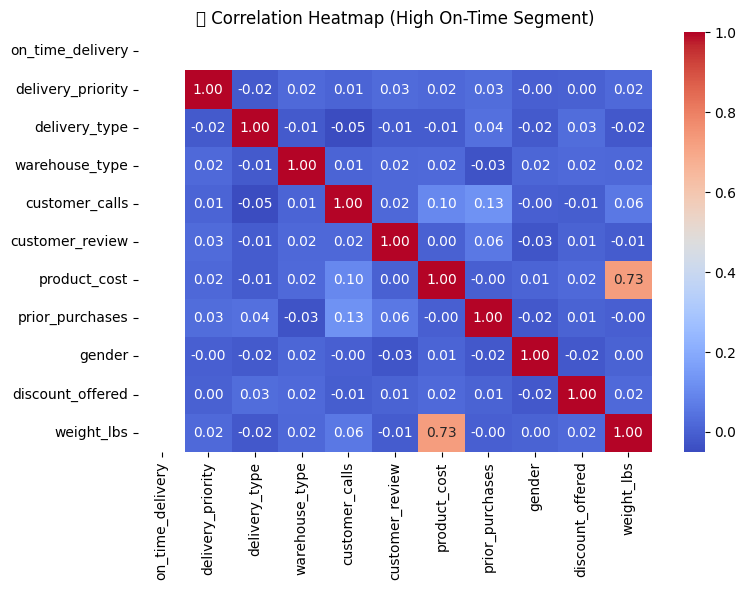

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_segments.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔍 Correlation Heatmap (High On-Time Segment)")
plt.tight_layout()
plt.show()


In [25]:
# Step 1: Create mapping dictionaries based on how label encoding was applied
delivery_type_map = {0: 'Flight', 1: 'Ship', 2: 'Road'}
warehouse_type_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F'}
delivery_priority_map = {0: 'low', 1: 'medium', 2: 'high'}
gender_map = {0: 'F', 1: 'M'}
on_time_delivery_map = {0: 'Late', 1: 'On Time'}

# Step 2: Map numeric values back to original string labels
df_segments['delivery_type'] = df_segments['delivery_type'].map(delivery_type_map)
df_segments['warehouse_type'] = df_segments['warehouse_type'].map(warehouse_type_map)
df_segments['delivery_priority'] = df_segments['delivery_priority'].map(delivery_priority_map)
df_segments['gender'] = df_segments['gender'].map(gender_map)
df_segments['on_time_delivery'] = df_segments['on_time_delivery'].map(on_time_delivery_map)

# Optional: Confirm updates
df_segments[['delivery_type', 'warehouse_type', 'delivery_priority', 'gender', 'on_time_delivery']].head()


,delivery_type,warehouse_type,delivery_priority,gender,on_time_delivery
0,Flight,F,medium,M,On Time
1,Flight,A,medium,M,On Time
2,Flight,C,high,F,On Time
3,Flight,D,medium,F,On Time
4,Flight,F,medium,F,On Time


<ipython-input-27-9f2fb588eae0>:16: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


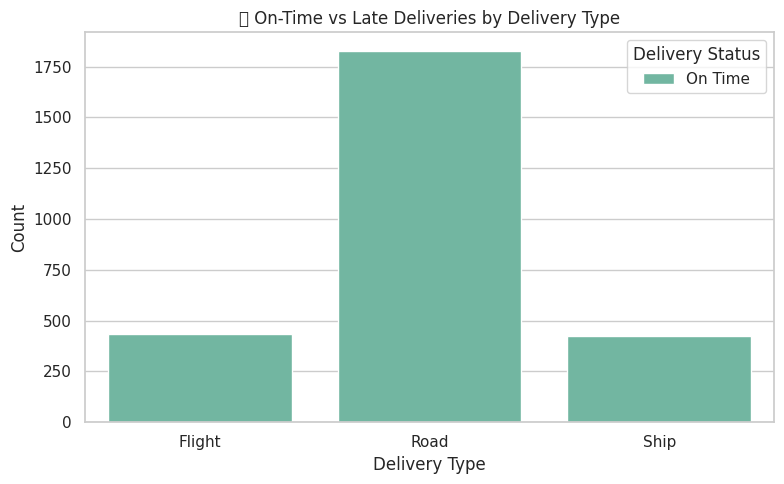

<ipython-input-27-9f2fb588eae0>:28: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


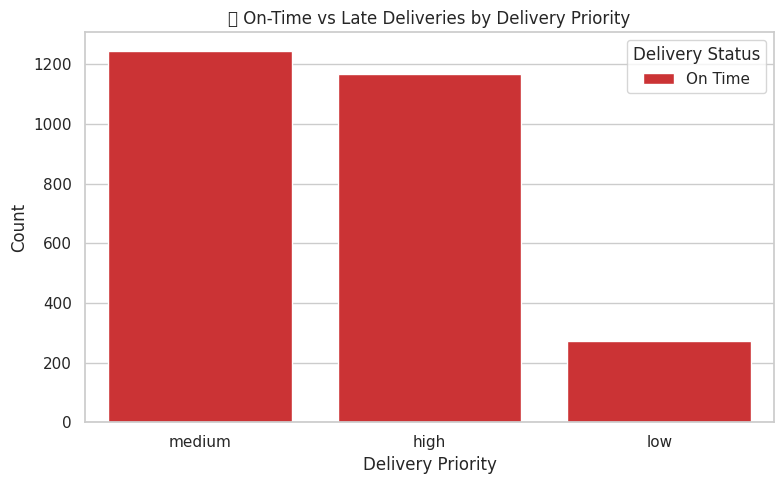

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# -------------------------------
# Bar Plot: On-Time vs Late by Delivery Type
# -------------------------------
plt.figure(figsize=(8, 5))
sns.countplot(data=df_segments, x='delivery_type', hue='on_time_delivery', palette='Set2')
plt.title('🚚 On-Time vs Late Deliveries by Delivery Type')
plt.xlabel('Delivery Type')
plt.ylabel('Count')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()

# -------------------------------
# Bar Plot: On-Time vs Late by Delivery Priority
# -------------------------------
plt.figure(figsize=(8, 5))
sns.countplot(data=df_segments, x='delivery_priority', hue='on_time_delivery', palette='Set1')
plt.title('🎯 On-Time vs Late Deliveries by Delivery Priority')
plt.xlabel('Delivery Priority')
plt.ylabel('Count')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()


<ipython-input-28-67ace8770c3e>:7: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


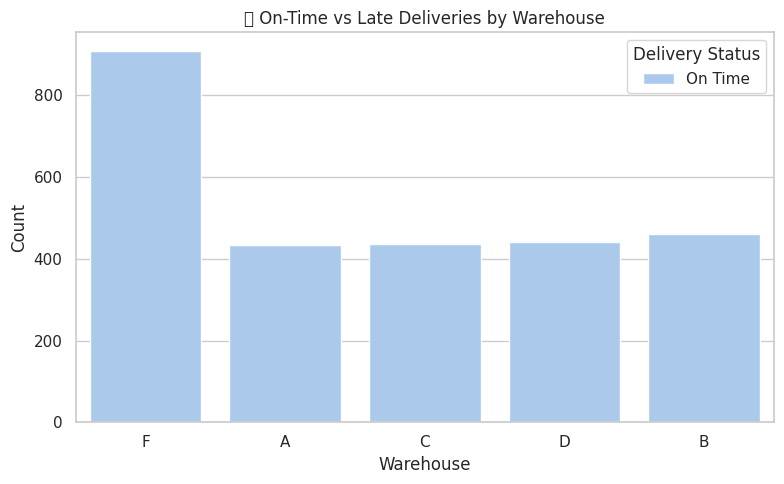

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_segments, x='warehouse_type', hue='on_time_delivery', palette='pastel')
plt.title('🏬 On-Time vs Late Deliveries by Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Count')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()


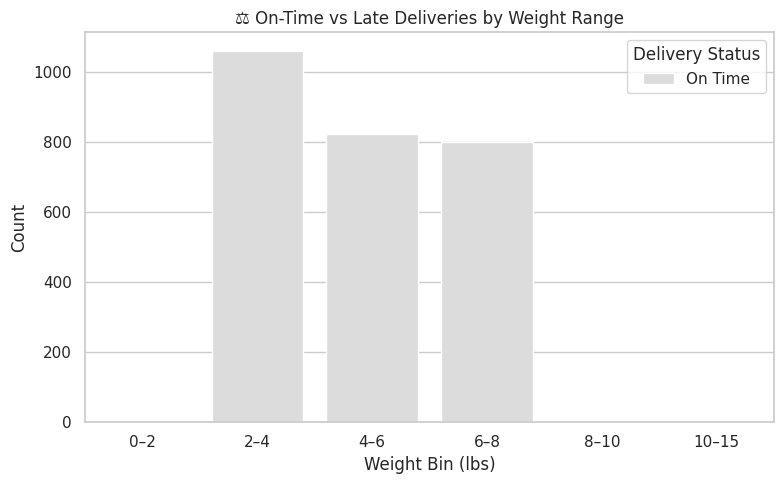

In [29]:
# Create weight bins
bins = [0, 2, 4, 6, 8, 10, 15]
labels = ['0–2', '2–4', '4–6', '6–8', '8–10', '10–15']
df_segments['weight_bin'] = pd.cut(df_segments['weight_lbs'], bins=bins, labels=labels, right=False)

# Plot by weight bins
plt.figure(figsize=(8, 5))
sns.countplot(data=df_segments, x='weight_bin', hue='on_time_delivery', palette='coolwarm')
plt.title('⚖️ On-Time vs Late Deliveries by Weight Range')
plt.xlabel('Weight Bin (lbs)')
plt.ylabel('Count')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()
